In [1]:
import json
import os
import pandas as pd
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math
from scipy import mean
import time
from sklearn.metrics import confusion_matrix

In [2]:
surveyDir = "C:/Users/ZhanYuan/Desktop/polimi/magistrale/Tesi/MyLocalProject/human-and-robotic-exploration/DownloadedResults/Survey"
humanResultDir = "C:/Users/ZhanYuan/Desktop/polimi/magistrale/Tesi/MyLocalProject/human-and-robotic-exploration/DownloadedResults"
robotResultDir = "C:/Users/ZhanYuan/Desktop/polimi/magistrale/Tesi/MyLocalProject/human-and-robotic-exploration/Unity/Project Arena/Assets/Results/ExperimentSamplesMultyTarget1"
originalMapDir = "C:/Users/ZhanYuan/Desktop/polimi/magistrale/Tesi/MyLocalProject/human-and-robotic-exploration/Python"
fileName_prefix = "Result"
fileName_suffix = "t.txt"

## draw the path

In [3]:
# this function is used to convert the positions stored in database into normal coordinates
def rotate(x, y, origin, mapName):
    
    # shift to origin
    x1 = x #- origin[0]
    y1 = y #- origin[1]

    #rotate
    x2 = y1
    y2 = -x1
    
    # shift back
    x3 = x2
    if mapName == "uffici2.map":
        y3 = y2 +53
    if mapName == "open2.map":
        y3 = y2 +57
    if mapName == "open1.map":
        y3 = y2 +48
    if mapName == "uffici1.map":
        y3 = y2 +54 

    return x3, y3

In [4]:
# this function draw the path of trajectory iteratively

def drawPath(fileDir, resultFileName):
    completePath = fileDir + "/" + resultFileName
    
    if os.path.isfile(completePath):
        with open(completePath) as pathFile:
            data = json.load(pathFile)
            mapName = data["mapName"]
            array_position = data["position"]
            
            if mapName == "open1.map":
                originalMapFile = "open1PythonFormat.map.txt"
            if mapName == "open2.map":
                originalMapFile = "open2PythonFormat.map.txt"
            if mapName == "uffici1.map":
                originalMapFile = "uffici1PythonFormat.map.txt"
            if mapName == "uffici2.map":
                originalMapFile = "uffici2PythonFormat.map.txt"
    
    # draw the original map
    if os.path.isfile(originalMapDir + "/" + originalMapFile):
        with open(originalMapDir + "/" + originalMapFile) as f:
            array = []
            content = f.readlines()
            content = [x.strip() for x in content]
            j = 0
            for line in content:
                array = line.split(',')
                for i in range(len(array)):
                    a = int(array[i])
                    if a == 1:
                        plt.plot(i, len(content)-j, 'ks')                       
                    if a == 4:
                        plt.plot(i, len(content)-j , 'gs')
                j = j + 1 
                
        
    #draw the path iteratively
    plt.ion()
    origin = (0.0,0.0)
    for i in range(len(array_position) - 1):
        x, z = array_position[i].split(",")
        x, z = rotate(int(x),int(z), origin, mapName)
        
        a, b = array_position[i + 1].split(",")
        a, b = rotate(int(a),int(b), origin, mapName)

        plt.plot([x, a], [z, b], 'k-')
        plt.pause(0.1)
        
    plt.show()
    
            

In [5]:
%matplotlib 
drawPath(humanResultDir, "result22t.txt")

Using matplotlib backend: Qt5Agg


## dictionary

In [109]:
result_mapname_dict = {} # key: path file name, value: map used
player_result_dict = {}  # key: player ip, value: path file name

player_survey_dict = {}  # key: player ip, value: survey file name
player_survey_choices = {} #key: player ip, value: servey choices
explored_dict = {} # key: player ip, value: [estimate percentage, real percentage]

distance_uffici1 = {} #distances travelled in uffic11; key: player ip, value: distance
distance_uffici2 = {} #distances travelled in uffic12; key: player ip, value: distance
distance_open1 = {} #distances travelled in open1; key: player ip, value: distance
distance_open2 = {} #distances travelled in open2; key: player ip, value: distance

## path file  analysis 

In [110]:
# compute the euclidean distance travelled of a trajectory
def ComputeDistance(array_position):
    """
    input: array_position = ["pos_x, pos_y", ...]
    output: euclidean distance 
    """
    
    distance = 0
    
    for i in range(len(array_position) - 1):
        x, y = array_position[i].split(",")
        a, b = array_position[i + 1].split(",")
        x = int(x)
        y = int(y)
        a = int(a)
        b = int(b)
        distance += math.sqrt(math.pow(a-x, 2) + math.pow(b-y, 2))
    return distance   

In [111]:
def pathAnalysis(fileDir, prefix, suffix, human=True):
    resultFinished = False
    startResultIndex = 1

    while(resultFinished == False):    
        completeResultFilePath = fileDir + "/" + prefix + str(startResultIndex) + suffix

        if os.path.isfile(completeResultFilePath):
            with open(completeResultFilePath) as resultFile:

                resultData = json.load(resultFile)
                
                if human:
                    resultIp = resultData["ip"] 
                else:
                    resultIp = "robort"+str(startResultIndex)
                    
                resultMap = resultData["mapName"]
                array_position = resultData["position"]

                # build the dictionary of relationship between player ip and path file
                if resultIp not in player_result_dict:
                    player_result_dict[resultIp] = set()

                player_result_dict[resultIp].add(prefix + str(startResultIndex) + suffix)
                result_mapname_dict[prefix + str(startResultIndex) + suffix] = resultMap
                startResultIndex += 1

                # build the dictionary with 
                if resultMap == "open1.map":
                    distance_open1[resultIp] = ComputeDistance(array_position)               
                if resultMap == "open2.map":
                    distance_open2[resultIp] = ComputeDistance(array_position)
                if resultMap == "uffici1.map":
                    distance_uffici1[resultIp] = ComputeDistance(array_position)
                if resultMap == "uffici2.map":
                    distance_uffici2[resultIp] = ComputeDistance(array_position)

        else:
            resultFinished = True

#### show

In [112]:
pathAnalysis(humanResultDir, fileName_prefix, fileName_suffix)

In [113]:
for key in result_mapname_dict:
    print(key, "\t->\t", result_mapname_dict[key])

Result1t.txt 	->	 open1.map
Result2t.txt 	->	 open2.map
Result3t.txt 	->	 open1.map
Result4t.txt 	->	 open1.map
Result5t.txt 	->	 uffici2.map
Result6t.txt 	->	 open2.map
Result7t.txt 	->	 open1.map
Result8t.txt 	->	 open2.map
Result9t.txt 	->	 uffici2.map
Result10t.txt 	->	 open2.map
Result11t.txt 	->	 uffici2.map
Result12t.txt 	->	 uffici1.map
Result13t.txt 	->	 uffici2.map
Result14t.txt 	->	 open2.map
Result15t.txt 	->	 open1.map
Result16t.txt 	->	 open2.map
Result17t.txt 	->	 open1.map
Result18t.txt 	->	 uffici1.map
Result19t.txt 	->	 open1.map
Result20t.txt 	->	 open2.map
Result21t.txt 	->	 open1.map
Result22t.txt 	->	 uffici1.map
Result23t.txt 	->	 uffici2.map
Result24t.txt 	->	 uffici1.map
Result25t.txt 	->	 open1.map
Result26t.txt 	->	 open2.map
Result27t.txt 	->	 uffici2.map
Result28t.txt 	->	 open2.map


In [114]:
for key in player_result_dict:
    print(key, "\t->\t", player_result_dict[key])

10.81.60.148 	->	 {'Result1t.txt', 'Result2t.txt'}
10.190.28.15 	->	 {'Result3t.txt'}
10.21.145.113 	->	 {'Result4t.txt'}
10.41.203.49 	->	 {'Result5t.txt', 'Result6t.txt'}
10.181.109.73 	->	 {'Result8t.txt', 'Result7t.txt'}
10.7.181.120 	->	 {'Result10t.txt', 'Result9t.txt'}
10.150.134.248 	->	 {'Result11t.txt', 'Result12t.txt'}
10.13.215.245 	->	 {'Result14t.txt', 'Result13t.txt'}
10.31.72.218 	->	 {'Result15t.txt', 'Result16t.txt'}
10.30.82.114 	->	 {'Result18t.txt', 'Result17t.txt'}
10.45.76.149 	->	 {'Result20t.txt', 'Result19t.txt'}
10.45.245.200 	->	 {'Result22t.txt', 'Result21t.txt'}
10.51.190.34 	->	 {'Result24t.txt', 'Result23t.txt'}
10.45.249.93 	->	 {'Result26t.txt', 'Result25t.txt'}
10.65.198.176 	->	 {'Result27t.txt', 'Result28t.txt'}


### distance analysis

In [115]:
# plot path distance of given dictionary in scatter plot
def showPathDistance(dictionary, truncated=0, title=""):
    
    """
    dictionary: key->player ip, value->distance travelled
    truncated: number of min/max extreme to be eliminated
    """
    
    count = 0
    sortedList = sorted(dictionary.items(), key=lambda kv: kv[1])
    for i in sortedList:
        print(i[0],"\t",i[1])
        plt.plot(count, i[1], "ro")
        count +=1
        
    plt.xlabel("count")
    plt.ylabel("distance (unit_cell)")
    plt.title(title)
    plt.show()
    
    print("mean: ", mean(sorted(dictionary.values())))
    if truncated != 0:
        print("truncated mean :", mean(sorted(dictionary.values())[truncated : len(dictionary)-truncated]))

#### open1

10.30.82.114 	 27.52733584216013
10.21.145.113 	 30.41640786499874
10.81.60.148 	 186.69619991867233
10.190.28.15 	 214.8928892247379
10.45.249.93 	 250.8503065539761
10.45.245.200 	 266.58597573261966
10.181.109.73 	 273.7307362563458
10.45.76.149 	 570.5238878058306
10.31.72.218 	 819.467253015037


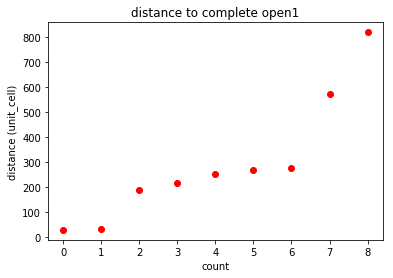

mean:  293.410110246042


In [116]:
%matplotlib inline
showPathDistance(distance_open1,title="distance to complete open1")

#### open2

10.7.181.120 	 205.17668566812878
10.41.203.49 	 207.9313224755435
10.45.76.149 	 218.64390481503682
10.31.72.218 	 251.8116380115376
10.81.60.148 	 272.2440180965026
10.45.249.93 	 433.63688539384117
10.65.198.176 	 475.18829212013185
10.13.215.245 	 911.4834883904771
10.181.109.73 	 1578.7217031670332


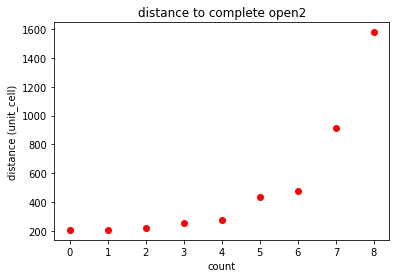

mean:  506.09310423758143


In [117]:
%matplotlib inline
showPathDistance(distance_open2, title="distance to complete open2")

#### uffici1

10.45.245.200 	 384.6177755061994
10.150.134.248 	 596.4647513134933
10.30.82.114 	 725.7327841274413
10.51.190.34 	 808.0884722681133


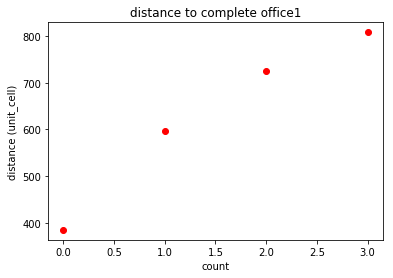

mean:  628.7259458038118


In [118]:
%matplotlib inline
showPathDistance(distance_uffici1, title="distance to complete office1")

#### uffici2

10.41.203.49 	 64.6426524245728
10.150.134.248 	 83.55144257626988
10.65.198.176 	 119.37009299206893
10.7.181.120 	 136.48204086418977
10.13.215.245 	 165.87957675224888
10.51.190.34 	 279.12032189870257


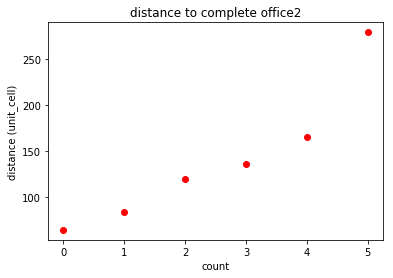

mean:  141.50768791800883


In [119]:
%matplotlib inline
showPathDistance(distance_uffici2, title="distance to complete office2")

## area explored

In [120]:
def neighbors(coordinate, r):
    resList = []
    for i in range(-r, r + 1):
        for j in range(-r, r + 1):
            resList.append([coordinate[0] + i, coordinate[1] + j])    
    return np.array(resList)

In [121]:
def areaExplored(fileDir,resultFileName, r, plot=False):
    completePath = fileDir + "/" + resultFileName
    
    countFreeTile = 0
    countExploredTile = 0

    exploredTiles = []
   
    if os.path.isfile(completePath):
        with open(completePath) as pathFile:
            data = json.load(pathFile)
            mapName = data["mapName"]
            array_position = data["position"]
            
            if mapName == "open1.map":
                originalMapFile = "open1PythonFormat.map.txt"
            if mapName == "open2.map":
                originalMapFile = "open2PythonFormat.map.txt"
            if mapName == "uffici1.map":
                originalMapFile = "uffici1PythonFormat.map.txt"
            if mapName == "uffici2.map":
                originalMapFile = "uffici2PythonFormat.map.txt"
    
    #draw explored area

    origin = (0.0,0.0)
    for i in range(len(array_position)):
        x,z = array_position[i].split(",")
        x, z = rotate(int(x),int(z), origin, mapName)
        
        area = neighbors([x, z], r)
        for a in area.tolist():            
            if a not in exploredTiles:
                exploredTiles.append(a)
    
    # draw the original map
    if os.path.isfile(originalMapDir + "/" + originalMapFile):
        with open(originalMapDir + "/" + originalMapFile) as f:
            array = []
            content = f.readlines()

            content = [x.strip() for x in content]
            j = 0
            for line in content:
                array = line.split(',')
                for i in range(len(array)):
                    a = int(array[i])
                    if a == 1:
                        if plot:
                            plt.plot(i, len(content)-j, 'ks')
                        countFreeTile = countFreeTile
                    else:
                        if a == 4:
                            if plot:
                                plt.plot(i, len(content)-j , 'gs')
                            if [i, len(content)-j] in exploredTiles:
                                countExploredTile += 1
                        elif [i, len(content)-j] in exploredTiles:
                            if plot:
                                plt.plot(i, len(content)-j, 'ys')
                            countExploredTile += 1
                        countFreeTile += 1
                j = j + 1 
    if plot:        
        plt.show()
        print("explored area = %.2f%%" %(countExploredTile/countFreeTile * 100))
    
    return countExploredTile/countFreeTile * 100

In [122]:
areaExplored(humanResultDir, "Result2t.txt", 3)

83.70883882149047

# ------------------------------------------------------------------------------------------------------

## survey file analysis

In [123]:
# build the dictionary with ip as key and map played as value

surveyFinished = False
startSurveyIndex = 1

while(surveyFinished == False):

    completeSurveyFilePath = surveyDir + "/" + fileName_prefix + str(startSurveyIndex) + ".txt"

    if os.path.isfile(completeSurveyFilePath):
        with open(completeSurveyFilePath) as surveyFile:

            surveyData = json.load(surveyFile)

            surveyIp = surveyData["ip"]
            mapUsed = surveyData["mapname"]
            choiceone = int(surveyData["choiceone"].strip())
            choicetwo = int(surveyData["choicetwo"].strip())
            choicethree = int(surveyData["choicethree"].strip())
            choicefour = int(surveyData["choicefour"].strip()) 

            # build the dictionary with ip as key and map played as value    
            player_survey_dict[surveyIp] = fileName_prefix + str(startSurveyIndex) + ".txt"
            player_survey_choices[surveyIp] = [choiceone, choicetwo, choicethree, choicefour]


            # build the dictionary for choice 3: explored_dict
            # estimate percentage
            if choicethree == 1:
                choicethree = "<50"
            if choicethree == 2:
                choicethree = "50-75"
            if choicethree == 3:
                choicethree = ">75"

            # go to check the player's path
            startResultIndex = 1
            resultFinished = False
            while(resultFinished == False):
                completeResultFilePath = humanResultDir + "/" + fileName_prefix + str(startResultIndex) + fileName_suffix
                if os.path.isfile(completeResultFilePath):
                    with open(completeResultFilePath) as resultFile:
                        resultData = json.load(resultFile)

                        resultIp = resultData["ip"]
                        resultMap = resultData["mapName"]
                        if resultIp == surveyIp and resultMap == mapUsed:
                            area = areaExplored(humanResultDir, fileName_prefix + str(startResultIndex) + fileName_suffix, 3)
                            explored_dict[surveyIp] = np.array([choicethree, area])
                        startResultIndex += 1
                else:
                    resultFinished = True

            startSurveyIndex += 1
    else:
        surveyFinished = True

In [124]:
for key in player_survey_dict:
    print(key, "\t->\t", player_survey_dict[key], "\t->\t", player_survey_choices[key])

10.41.203.49 	->	 Result1.txt 	->	 [1, 3, 2, 2]
10.181.109.73 	->	 Result2.txt 	->	 [1, 2, 3, 3]
10.7.181.120 	->	 Result3.txt 	->	 [1, 2, 1, 2]
10.150.134.248 	->	 Result4.txt 	->	 [1, 3, 3, 2]
10.13.215.245 	->	 Result5.txt 	->	 [4, 3, 2, 1]
10.31.72.218 	->	 Result6.txt 	->	 [1, 3, 1, 3]
10.30.82.114 	->	 Result7.txt 	->	 [1, 2, 2, 1]
10.45.76.149 	->	 Result8.txt 	->	 [1, 2, 1, 2]
10.45.245.200 	->	 Result9.txt 	->	 [2, 2, 3, 1]
10.51.190.34 	->	 Result10.txt 	->	 [4, 3, 3, 1]
10.45.249.93 	->	 Result11.txt 	->	 [1, 3, 2, 1]
10.65.198.176 	->	 Result12.txt 	->	 [4, 3, 3, 2]


## Similarity player

#### based on first and second question of survey

In [125]:
# get the coordinate to allocate bar
def barCoordinate(distance_dict, player_choices):
    """
    distance_dict: key->player ip, value->distance
    player_choices: key->player ip, value->survey choices
    
    return: x,y,bottom,witdh,depth,top
    """
    x = []
    y = []
    top = []
    for i in distance_dict:
        if i in player_choices:
            x.append(player_choices[i][0])
            y.append(player_choices[i][1])
            top.append(distance_dict[i])
    return np.array(x), np.array(y), np.zeros(len(x)), np.ones(len(x)), np.ones(len(x)), np.array(top)

[Text(0,0,'never'), Text(0,0,'used to'), Text(0,0,'')]

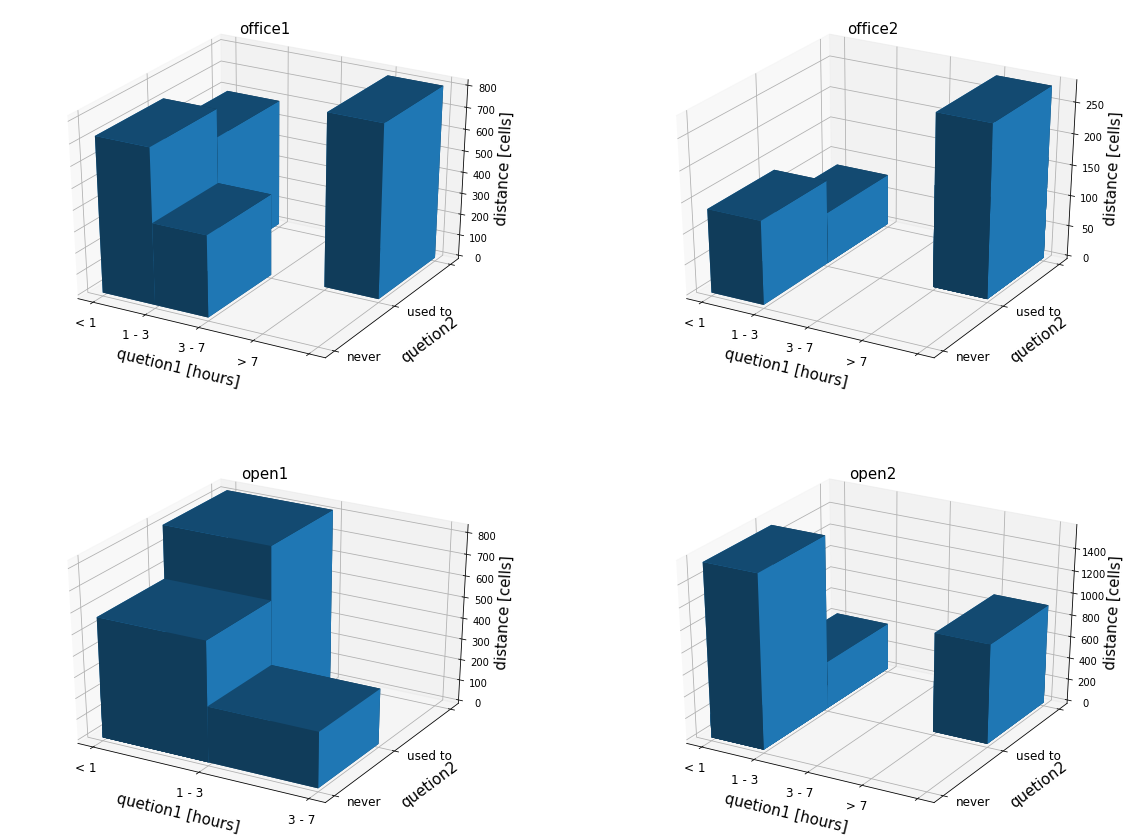

In [126]:
%matplotlib inline
fig = plt.figure(figsize=(20, 15))
uff1 = fig.add_subplot(221, projection='3d')
uff2 = fig.add_subplot(222, projection='3d')
open1 = fig.add_subplot(223, projection='3d')
open2 = fig.add_subplot(224,projection='3d')

x_uff1, y_uff1, bottom_uff1, width_uff1, depth_uff1, top_uff1 = barCoordinate(distance_uffici1, player_survey_choices)
x_uff2, y_uff2, bottom_uff2, width_uff2, depth_uff2, top_uff2 = barCoordinate(distance_uffici2, player_survey_choices)
x_open1, y_open1, bottom_open1, width_open1, depth_open1, top_open1 = barCoordinate(distance_open1, player_survey_choices)
x_open2, y_open2, bottom_open2, width_open2, depth_open2, top_open2 = barCoordinate(distance_open2, player_survey_choices)

uff1.bar3d(x_uff1, y_uff1, bottom_uff1, width_uff1, depth_uff1, top_uff1)
uff2.bar3d(x_uff2, y_uff2, bottom_uff2, width_uff2, depth_uff2, top_uff2)
open1.bar3d(x_open1, y_open1, bottom_open1, width_open1, depth_open1, top_open1)
open2.bar3d(x_open2, y_open2, bottom_open2, width_open2, depth_open2, top_open2)

uff1.set_xlabel("quetion1 [hours]", fontsize = 15)
uff1.set_ylabel("quetion2", fontsize = 15)
uff1.set_zlabel("distance [cells]", fontsize = 15)
uff1.xaxis.set_major_locator(ticker.MultipleLocator(1))
uff1.yaxis.set_major_locator(ticker.MultipleLocator(1))
uff1.set_title("office1",fontsize = 15)
uff1.xaxis.labelpad = 12
uff1.yaxis.labelpad = 12

uff2.set_xlabel("quetion1 [hours]", fontsize = 15)
uff2.set_ylabel("quetion2", fontsize = 15)
uff2.set_zlabel("distance [cells]", fontsize = 15)
uff2.xaxis.set_major_locator(ticker.MultipleLocator(1))
uff2.yaxis.set_major_locator(ticker.MultipleLocator(1))
uff2.set_title("office2",fontsize = 15)
uff2.xaxis.labelpad = 12
uff2.yaxis.labelpad = 12

open1.set_xlabel("quetion1 [hours]", fontsize = 15)
open1.set_ylabel("quetion2", fontsize = 15)
open1.set_zlabel("distance [cells]", fontsize = 15)
open1.xaxis.set_major_locator(ticker.MultipleLocator(1))
open1.yaxis.set_major_locator(ticker.MultipleLocator(1))
open1.set_title("open1",fontsize = 15)
open1.xaxis.labelpad = 12
open1.yaxis.labelpad = 12

open2.set_xlabel("quetion1 [hours]", fontsize = 15)
open2.set_ylabel("quetion2", fontsize = 15)
open2.set_zlabel("distance [cells]", fontsize = 15)
open2.xaxis.set_major_locator(ticker.MultipleLocator(1))
open2.yaxis.set_major_locator(ticker.MultipleLocator(1))
open2.set_title("open2", fontsize=15)
open2.xaxis.labelpad = 12
open2.yaxis.labelpad = 12


uff1.set_xticklabels(["< 1", "1 - 3 ", "3 - 7", " > 7", ""],fontsize=12)
uff1.set_yticklabels(["never", "used to", ""],fontsize=12, horizontalalignment='left', verticalalignment='bottom')

uff2.set_xticklabels(["< 1", "1 - 3 ", "3 - 7", " > 7", ""],fontsize=12)
uff2.set_yticklabels(["never", "used to", ""],fontsize=12, horizontalalignment='left', verticalalignment='bottom')

open1.set_xticklabels(["< 1", "1 - 3 ", "3 - 7"],fontsize=12)
open1.set_yticklabels(["never", "used to", ""],fontsize=12, horizontalalignment='left', verticalalignment='bottom')

open2.set_xticklabels(["< 1", "1 - 3 ", "3 - 7", " > 7", ""],fontsize=12)
open2.set_yticklabels(["never", "used to", ""],fontsize=12, horizontalalignment='left', verticalalignment='bottom')

## choice three

In [127]:
for i in explored_dict:
    print(i, "\t->\t",explored_dict[i])

10.41.203.49 	->	 ['50-75' '82.14904679376083']
10.181.109.73 	->	 ['>75' '100.0']
10.7.181.120 	->	 ['<50' '90.1213171577123']
10.150.134.248 	->	 ['>75' '80.78549848942598']
10.13.215.245 	->	 ['50-75' '98.52686308492201']
10.31.72.218 	->	 ['<50' '92.89428076256499']
10.30.82.114 	->	 ['50-75' '88.64048338368579']
10.45.76.149 	->	 ['<50' '66.03119584055459']
10.45.245.200 	->	 ['>75' '78.85196374622356']
10.51.190.34 	->	 ['>75' '86.46525679758308']
10.45.249.93 	->	 ['50-75' '98.00693240901212']
10.65.198.176 	->	 ['>75' '95.32062391681109']


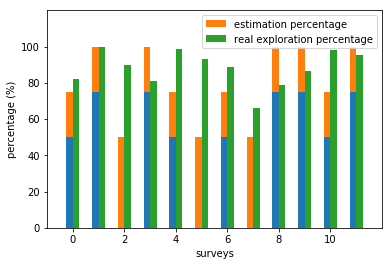

In [198]:
%matplotlib inline
index = np.arange(len(explored_dict))
a1 = np.empty(0)
a2 = np.empty(0)
b = np.empty(0) 

for key in player_survey_dict.keys():
    
    if explored_dict[key][0] =="<50":
        lowerLimit = 0.0
        upper = 0.5
    if explored_dict[key][0] == "50-75":
        lowerLimit = 0.5
        upper = 0.25
    if explored_dict[key][0] == ">75":
        lowerLimit = 0.75
        upper = 0.25
        
    a1 = np.append(a1, [lowerLimit])
    a2 = np.append(a2, [upper])
    
    b = np.append(b, [float(explored_dict[key][1]) / 100])
    
a1 *= 100
a2 *= 100
b *=100

total_width, n = 0.5, 2
width = total_width / n
index = index - (total_width - width) / 2

plt.bar(index, a1,  width=width)
plt.bar(index, a2, bottom=a1, width=width, label='estimation percentage')
plt.bar(index + width, b , width=width, label='real exploration percentage')
plt.ylabel("percentage (%)")
plt.xlabel("surveys")
plt.axis((-1, 12, 0, 120))
plt.yticks([0,20,40,60,80,100])
plt.xticks([0,2,4,6,8,10])
plt.legend(loc = 1)
plt.grid(False)
plt.show()

[ 82.14904679 100.          90.12131716  80.78549849  98.52686308
  92.89428076  88.64048338  66.03119584  78.85196375  86.4652568
  98.00693241  95.32062392] [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[12, 12]


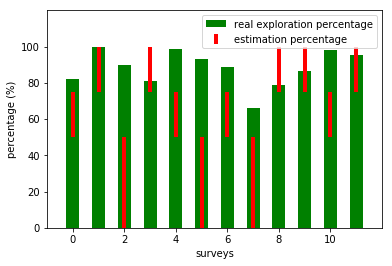

In [201]:
%matplotlib inline
index = np.arange(len(explored_dict))
a1 = np.empty(0)
a2 = np.empty(0)
lower = np.empty(0)
upper = np.empty(0)
yasse = np.empty(0)
b = np.empty(0) 

for key in player_survey_dict.keys():
    
    b = np.append(b, [float(explored_dict[key][1]) / 100])
    
    if explored_dict[key][0] =="<50":
        lower = np.append(lower, 0)
        upper = np.append(upper, 50)
        yasse = np.append(yasse, 0)
    if explored_dict[key][0] == "50-75":
        lower = np.append(lower, 0)
        upper = np.append(upper, 25)
        yasse = np.append(yasse, 50)
    if explored_dict[key][0] == ">75":
        lower = np.append(lower, 0)
        upper = np.append(upper, 25)
        yasse = np.append(yasse, 75)
    
    
a1 *= 100
a2 *= 100
b *=100

total_width = 0.5
print(b,x)
print([len(lower), len(upper)])
plt.bar(index, b , width=total_width, label='real exploration percentage', color = 'green')
plt.errorbar([0,1,2,3,4,5,6,7,8,9,10,11], yasse, yerr=[lower, upper], ls= '',color='red', label='estimation percentage',elinewidth=4)

plt.axis((-1, 12, 0, 120))
plt.yticks([0,20,40,60,80,100])
plt.xticks([0,2,4,6,8,10])
plt.legend(loc = 1)
plt.grid(False)
plt.ylabel("percentage (%)")
plt.xlabel("surveys")
plt.show()

## most probable map - choice 4

In [26]:
real_y = np.ones(len(player_survey_choices),dtype=np.int8)
predicted_y = []
for i in player_survey_choices:
    predicted_y.append((1 if int(player_survey_choices[i][3]) == 1 else 0))

cm = confusion_matrix(real_y,predicted_y)

cm_dataframe = pd.DataFrame({'A': [cm[0][0], cm[1][0]],
                             'B': [cm[0][1], cm[1][1]]})


cm_dataframe.columns=["non-correct", "correct"]
cm_dataframe.index=["non-correct", "correct"]
cm_dataframe = cm_dataframe.rename_axis('actual').rename_axis('predicted', axis='columns')

(tn, fp, fn, tp) = cm.ravel()
print("accuracy = %.2f%%" % ((tp+tn) / (tn+fp+fn+tp) * 100))

cm_dataframe

accuracy = 41.67%


predicted,non-correct,correct
actual,,
non-correct,0,0
correct,7,5
